In [ ]:
import pandas as pd

In [ ]:
url = ("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/data_date.csv")

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.columns =df.columns.str.lower()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].dt.year

In [ ]:
df['month'] = df['date'].dt.month

In [ ]:
df['day'] = df['date'].dt.day

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_uz_2024 = df[(df['country'] == 'Uzbekistan') & (df['year'] == 2024)].sort_values('date')

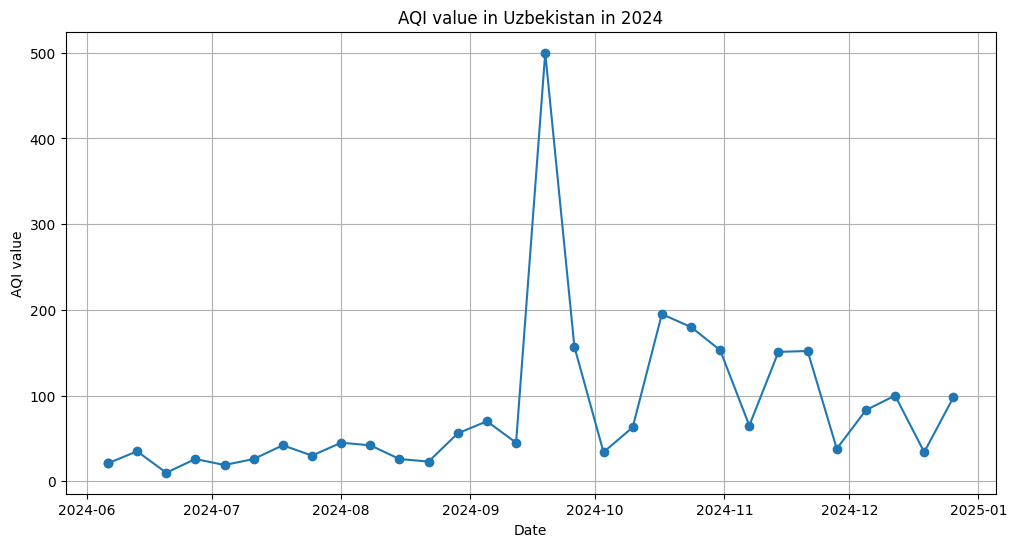

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_uz_2024['date'], df_uz_2024['aqi value'], marker='o')
plt.title("AQI value in Uzbekistan in 2024")
plt.xlabel("Date")
plt.ylabel("AQI value")
plt.grid(True)
plt.savefig("aqi_uzbekistan_2024_plot.png")
plt.show()

In [ ]:
import seaborn as sns

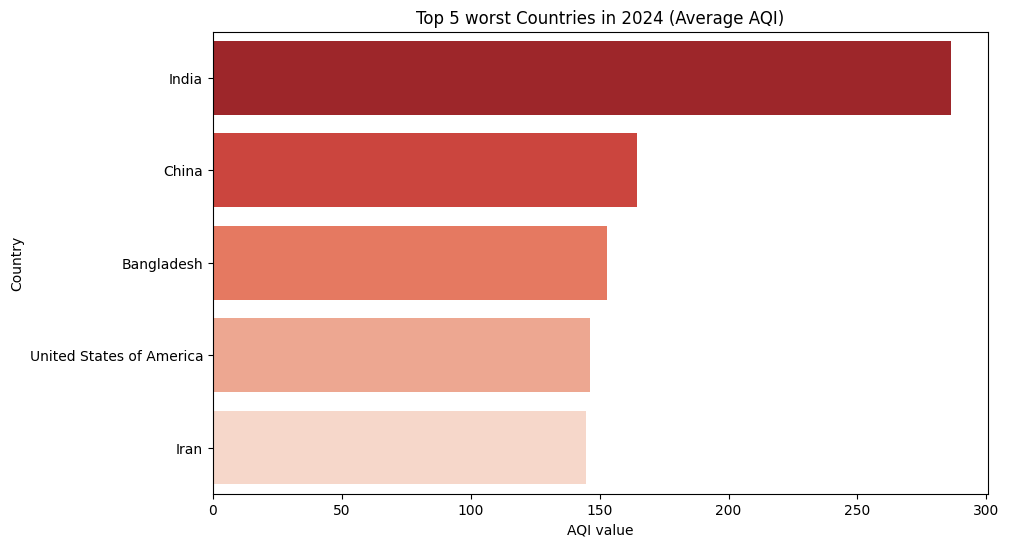

In [ ]:
df_2024 = df[df['year'] == 2024]
worst_5 = df_2024.groupby('country')['aqi value'].mean().reset_index().sort_values('aqi value', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='aqi value', y='country', data=worst_5, palette="Reds_r")
plt.title("Top 5 worst Countries in 2024 (Average AQI)")
plt.xlabel("AQI value")
plt.ylabel("Country")
plt.savefig("worst_5_countries_2024.png")
plt.show()

In [ ]:
avg_by_country_year = df.groupby(['country', 'year'])['aqi value'].mean().reset_index()

with pd.ExcelWriter("AQI_Report_2024.xlsx") as writer:
    df_uz_2024.to_excel(writer, sheet_name="Uzbekistan_2024", index=False)
    worst_5.to_excel(writer, sheet_name="Worst_5", index=False)
    avg_by_country_year.to_excel(writer, sheet_name="Average_by_Country_Year", index=False)

In [74]:
from google.colab import files

files.download("aqi_uzbekistan_2024_plot.png")
files.download("worst_5_countries_2024.png")
files.download("AQI_Report_2024.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
# Avval URL orqali o'qib olgan DataFrame'ni CSV faylga saqlaymiz
df.to_csv("aqi.csv", index=False)

# So'ng uni Colab orqali yuklab olamiz
from google.colab import files
files.download("aqi.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>